### Imports

In [ ]:
import warnings
warnings.filterwarnings("ignore")

!pwd
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir('/content/drive/My Drive/DSCI565_HW/Project/')
!pwd

/content/drive/MyDrive/DSCI565_HW/Project
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/DSCI565_HW/Project


In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch

In [16]:
# !pip install yfinance
import yfinance as yf

In [28]:
symbol = 'GOOGL'  # change as needed
start_date = '2009-01-01'
end_date = '2023-11-18'
df = yf.download(symbol, start=start_date, end=end_date)
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2009-01-02,7.722723,8.053554,7.645145,8.041041,8.041041,144275580
2009-01-05,8.033033,8.289289,7.882883,8.209459,8.209459,195364440
2009-01-06,8.332833,8.528529,8.167918,8.359860,8.359860,256750992
2009-01-07,8.216216,8.281031,7.976727,8.058308,8.058308,179600220
2009-01-08,7.964965,8.137888,7.941441,8.137888,8.137888,143883972
...,...,...,...,...,...,...
2023-11-13,131.779999,132.589996,131.250000,132.089996,132.089996,18324800
2023-11-14,134.190002,135.699997,133.320007,133.619995,133.619995,32395200
2023-11-15,134.869995,135.029999,133.570007,134.619995,134.619995,23861500


In [29]:
df.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [19]:
# Function to calculate EMA
def calculate_ema(data, alpha):
    ema_values = [data.iloc[0]]

    for i in range(1, len(data)):
        ema = alpha * data.iloc[i] + (1 - alpha) * ema_values[-1]
        ema_values.append(ema)

    return pd.Series(ema_values, index=data.index)


# Setting the smoothing factor (alpha) and window size
N = 14  # adjust value of N (window size) as needed
alpha = 2 / (N + 1)

df['EMA'] = calculate_ema(df['Close'], alpha)
df

,Open,High,Low,Close,Adj Close,Volume,EMA
Date,,,,,,,
2009-01-02,7.722723,8.053554,7.645145,8.041041,8.041041,144275580,8.041041
2009-01-05,8.033033,8.289289,7.882883,8.209459,8.209459,195364440,8.063497
2009-01-06,8.332833,8.528529,8.167918,8.359860,8.359860,256750992,8.103012
2009-01-07,8.216216,8.281031,7.976727,8.058308,8.058308,179600220,8.097052
2009-01-08,7.964965,8.137888,7.941441,8.137888,8.137888,143883972,8.102496
...,...,...,...,...,...,...,...
2023-11-13,131.779999,132.589996,131.250000,132.089996,132.089996,18324800,130.614241
2023-11-14,134.190002,135.699997,133.320007,133.619995,133.619995,32395200,131.015008
2023-11-15,134.869995,135.029999,133.570007,134.619995,134.619995,23861500,131.495673


In [20]:
# Function to calculate Money Flow Index (MFI)
def calculate_mfi(data, period=14):
    money_flow = ((data['High'] + data['Low'] + data['Close']) / 3) * data['Volume']
    positive_flow = (money_flow * (data['Close'] > data['Close'].shift(1))).rolling(window=period, min_periods=1).sum()
    negative_flow = (money_flow * (data['Close'] < data['Close'].shift(1))).rolling(window=period, min_periods=1).sum()

    money_flow_ratio = positive_flow / negative_flow
    money_flow_index = 100 - (100 / (1 + money_flow_ratio))

    return money_flow_index


df['MFI'] = calculate_mfi(df)
df

,Open,High,Low,Close,Adj Close,Volume,EMA,MFI
Date,,,,,,,,
2009-01-02,7.722723,8.053554,7.645145,8.041041,8.041041,144275580,8.041041,NaN
2009-01-05,8.033033,8.289289,7.882883,8.209459,8.209459,195364440,8.063497,100.000000
2009-01-06,8.332833,8.528529,8.167918,8.359860,8.359860,256750992,8.103012,100.000000
2009-01-07,8.216216,8.281031,7.976727,8.058308,8.058308,179600220,8.097052,71.940034
2009-01-08,7.964965,8.137888,7.941441,8.137888,8.137888,143883972,8.102496,77.073024
...,...,...,...,...,...,...,...,...
2023-11-13,131.779999,132.589996,131.250000,132.089996,132.089996,18324800,130.614241,46.425868
2023-11-14,134.190002,135.699997,133.320007,133.619995,133.619995,32395200,131.015008,60.107364
2023-11-15,134.869995,135.029999,133.570007,134.619995,134.619995,23861500,131.495673,71.210796


In [21]:
# Function to calculate RSI
def calculate_rsi(data, window=14):
    # Calculating daily price changes
    delta = data['Close'].diff(1)

    # Separate gains (positive changes) and losses (negative changes)
    gains = delta.where(delta > 0, 0)
    losses = -delta.where(delta < 0, 0)

    # Calculating average gains and losses over the specified window
    avg_gains = gains.rolling(window=window, min_periods=1).mean()
    avg_losses = losses.rolling(window=window, min_periods=1).mean()

    # Relative Strength (RS)
    rs = avg_gains / avg_losses

    # RSI
    rsi = 100 - (100 / (1 + rs))

    return rsi


df['RSI'] = calculate_rsi(df)
df

,Open,High,Low,Close,Adj Close,Volume,EMA,MFI,RSI
Date,,,,,,,,,
2009-01-02,7.722723,8.053554,7.645145,8.041041,8.041041,144275580,8.041041,NaN,NaN
2009-01-05,8.033033,8.289289,7.882883,8.209459,8.209459,195364440,8.063497,100.000000,100.000000
2009-01-06,8.332833,8.528529,8.167918,8.359860,8.359860,256750992,8.103012,100.000000,100.000000
2009-01-07,8.216216,8.281031,7.976727,8.058308,8.058308,179600220,8.097052,71.940034,51.391607
2009-01-08,7.964965,8.137888,7.941441,8.137888,8.137888,143883972,8.102496,77.073024,56.918086
...,...,...,...,...,...,...,...,...,...
2023-11-13,131.779999,132.589996,131.250000,132.089996,132.089996,18324800,130.614241,46.425868,39.340091
2023-11-14,134.190002,135.699997,133.320007,133.619995,133.619995,32395200,131.015008,60.107364,70.176333
2023-11-15,134.869995,135.029999,133.570007,134.619995,134.619995,23861500,131.495673,71.210796,85.216937


In [22]:
# Function to calculate MACD
def calculate_macd(data, theta1=26, theta2=12, macd_period=9):
    # Calculating EMAs
    ema_theta1 = data['Close'].ewm(span=theta1, adjust=False).mean()
    ema_theta2 = data['Close'].ewm(span=theta2, adjust=False).mean()

    # Calculating MACD line
    macd_line = ema_theta1 - ema_theta2

    # Calculating Signal line (Moving Average of MACD line)
    macd = macd_line.rolling(window=macd_period, min_periods=1).mean()

    return macd_line, macd


macd_line, macd = calculate_macd(df)

df['MACD'] = macd
df

,Open,High,Low,Close,Adj Close,Volume,EMA,MFI,RSI,MACD
Date,,,,,,,,,,
2009-01-02,7.722723,8.053554,7.645145,8.041041,8.041041,144275580,8.041041,NaN,NaN,0.000000
2009-01-05,8.033033,8.289289,7.882883,8.209459,8.209459,195364440,8.063497,100.000000,100.000000,-0.006718
2009-01-06,8.332833,8.528529,8.167918,8.359860,8.359860,256750992,8.103012,100.000000,100.000000,-0.016414
2009-01-07,8.216216,8.281031,7.976727,8.058308,8.058308,179600220,8.097052,71.940034,51.391607,-0.019528
2009-01-08,7.964965,8.137888,7.941441,8.137888,8.137888,143883972,8.102496,77.073024,56.918086,-0.021513
...,...,...,...,...,...,...,...,...,...,...
2023-11-13,131.779999,132.589996,131.250000,132.089996,132.089996,18324800,130.614241,46.425868,39.340091,1.786495
2023-11-14,134.190002,135.699997,133.320007,133.619995,133.619995,32395200,131.015008,60.107364,70.176333,1.546043
2023-11-15,134.869995,135.029999,133.570007,134.619995,134.619995,23861500,131.495673,71.210796,85.216937,1.276839


In [23]:
# Function to calculate CCI
def calculate_cci(df, window=14):
    typical_price = (df['High'] + df['Low'] + df['Close']) / 3
    sma = typical_price.rolling(window=window).mean()
    mad = typical_price.rolling(window=window).apply(lambda x: abs(x - x.mean()).mean(), raw=True)
    cci = (typical_price - sma) / (0.015 * mad)

    return cci


df['CCI'] = calculate_cci(df)
df

,Open,High,Low,Close,Adj Close,Volume,EMA,MFI,RSI,MACD,CCI
Date,,,,,,,,,,,
2009-01-02,7.722723,8.053554,7.645145,8.041041,8.041041,144275580,8.041041,NaN,NaN,0.000000,NaN
2009-01-05,8.033033,8.289289,7.882883,8.209459,8.209459,195364440,8.063497,100.000000,100.000000,-0.006718,NaN
2009-01-06,8.332833,8.528529,8.167918,8.359860,8.359860,256750992,8.103012,100.000000,100.000000,-0.016414,NaN
2009-01-07,8.216216,8.281031,7.976727,8.058308,8.058308,179600220,8.097052,71.940034,51.391607,-0.019528,NaN
2009-01-08,7.964965,8.137888,7.941441,8.137888,8.137888,143883972,8.102496,77.073024,56.918086,-0.021513,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2023-11-13,131.779999,132.589996,131.250000,132.089996,132.089996,18324800,130.614241,46.425868,39.340091,1.786495,91.629056
2023-11-14,134.190002,135.699997,133.320007,133.619995,133.619995,32395200,131.015008,60.107364,70.176333,1.546043,117.333378
2023-11-15,134.869995,135.029999,133.570007,134.619995,134.619995,23861500,131.495673,71.210796,85.216937,1.276839,109.888719


In [24]:
# Function to calculate ichimoku components
def calculate_ichimoku(data):

    # Tenkan-Sen (Conversion Line) - Calculate the average of the high and low prices for the last 9 periods
    nine_period_high = data['High'].rolling(window=9).max()
    nine_period_low = data['Low'].rolling(window=9).min()
    data['Tenkan_Sen'] = (nine_period_high + nine_period_low) / 2

    # Kijun-Sen (Base Line) - Calculate the average of the high and low prices for the last 26 periods
    twenty_six_period_high = data['High'].rolling(window=26).max()
    twenty_six_period_low = data['Low'].rolling(window=26).min()
    data['Kijun_Sen'] = (twenty_six_period_high + twenty_six_period_low) / 2

    # Calculate Senkou Span A (Leading Span A)
    data['Senkou_Span_A'] = ((data['Tenkan_Sen'] + data['Kijun_Sen']) / 2).shift(26)

    # Senkou Span B (Leading Span B) - Calculate the average of the high and low prices for the last 52 periods
    fifty_two_period_high = data['High'].rolling(window=52).max()
    fifty_two_period_low = data['Low'].rolling(window=52).min()
    data['Senkou_Span_B'] = ((fifty_two_period_high + fifty_two_period_low) / 2).shift(26)

    # Calculate Chikou Span (Lagging Span)
    data['Chikou_Span'] = data['Close'].shift(-26)

    return data[['Tenkan_Sen', 'Kijun_Sen', 'Senkou_Span_A', 'Senkou_Span_B', 'Chikou_Span']]


df[['Tenkan_Sen', 'Kijun_Sen', 'Senkou_Span_A', 'Senkou_Span_B', 'Chikou_Span']] = calculate_ichimoku(df)
df

,Open,High,Low,Close,Adj Close,Volume,EMA,MFI,RSI,MACD,CCI,Tenkan_Sen,Kijun_Sen,Senkou_Span_A,Senkou_Span_B,Chikou_Span
Date,,,,,,,,,,,,,,,,
2009-01-02,7.722723,8.053554,7.645145,8.041041,8.041041,144275580,8.041041,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,8.971722
2009-01-05,8.033033,8.289289,7.882883,8.209459,8.209459,195364440,8.063497,100.000000,100.000000,-0.006718,NaN,NaN,NaN,NaN,NaN,8.959960
2009-01-06,8.332833,8.528529,8.167918,8.359860,8.359860,256750992,8.103012,100.000000,100.000000,-0.016414,NaN,NaN,NaN,NaN,NaN,9.085335
2009-01-07,8.216216,8.281031,7.976727,8.058308,8.058308,179600220,8.097052,71.940034,51.391607,-0.019528,NaN,NaN,NaN,NaN,NaN,8.950951
2009-01-08,7.964965,8.137888,7.941441,8.137888,8.137888,143883972,8.102496,77.073024,56.918086,-0.021513,NaN,NaN,NaN,NaN,NaN,8.575075
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-13,131.779999,132.589996,131.250000,132.089996,132.089996,18324800,130.614241,46.425868,39.340091,1.786495,91.629056,128.260002,130.715,132.940002,132.770000,NaN
2023-11-14,134.190002,135.699997,133.320007,133.619995,133.619995,32395200,131.015008,60.107364,70.176333,1.546043,117.333378,131.314999,130.715,133.472504,132.770000,NaN
2023-11-15,134.869995,135.029999,133.570007,134.619995,134.619995,23861500,131.495673,71.210796,85.216937,1.276839,109.888719,131.779999,130.715,134.112499,133.049999,NaN


In [25]:
df.isna().sum()

Open              0
High              0
Low               0
Close             0
Adj Close         0
Volume            0
EMA               0
MFI               1
RSI               1
MACD              0
CCI              13
Tenkan_Sen        8
Kijun_Sen        25
Senkou_Span_A    51
Senkou_Span_B    77
Chikou_Span      26
dtype: int64

In [26]:
df.interpolate(method="linear", inplace=True)

In [27]:
df.isna().sum()

Open              0
High              0
Low               0
Close             0
Adj Close         0
Volume            0
EMA               0
MFI               1
RSI               1
MACD              0
CCI              13
Tenkan_Sen        8
Kijun_Sen        25
Senkou_Span_A    51
Senkou_Span_B    77
Chikou_Span       0
dtype: int64

In [14]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume,EMA,MFI,RSI,MACD,CCI,Tenkan_Sen,Kijun_Sen,Senkou_Span_A,Senkou_Span_B,Chikou_Span
count,3746.000000,3746.000000,3746.000000,3746.000000,3746.000000,3.746000e+03,3746.000000,3745.000000,3745.000000,3746.000000,3733.000000,3738.000000,3721.000000,3695.000000,3669.000000,3746.000000
mean,50.577762,51.102509,50.058551,50.593948,50.593948,6.396340e+07,50.377759,52.644769,54.638965,-0.231840,20.742911,50.487292,50.382017,49.958563,49.646590,51.476295
std,38.723848,39.178244,38.288604,38.740887,38.740887,5.416617e+07,38.578564,13.732995,16.699759,1.064396,106.758672,38.574860,38.345823,37.957618,37.490252,39.209874
min,7.215966,7.494995,7.075826,7.075826,7.075826,9.312000e+06,7.709763,6.883593,4.789759,-4.829080,-364.756694,7.635761,8.115741,8.032407,8.305181,7.279530
25%,16.905029,17.048298,16.811186,16.952327,16.952327,2.911468e+07,16.872685,42.676759,42.159819,-0.567744,-64.190645,16.965028,17.325201,17.112425,17.460211,17.408847
50%,38.337749,38.557001,37.888250,38.239500,38.239500,4.246830e+07,38.067615,52.921776,54.778232,-0.181848,36.415904,38.140001,38.007999,37.956251,37.309000,38.810749
75%,67.578499,68.194122,67.076000,67.553623,67.553623,8.389003e+07,67.154143,62.384129,66.710517,0.151063,102.582078,67.607500,66.034500,65.752062,63.490252,70.233873
max,151.250000,151.546494,148.899002,149.838501,149.838501,5.923990e+08,147.433237,100.000000,100.000000,4.859913,436.140399,147.752007,145.590500,145.473629,143.366501,149.838501


In [10]:
# # df[df.isna().any(axis=1)]
# df = df.dropna()
# df

In [13]:
def dataframe_to_tensor(df, state_length=30):
    # Assuming df is a DataFrame with the desired technical indicators as columns
    # Convert the DataFrame into a 3D tensor of shape [num_samples, state_len, num_features]
    num_samples = len(df) - state_length + 1
    num_features = len(df.columns)
    tensor = torch.zeros((num_samples, state_length, num_features))

    for i in range(num_samples):
        tensor[i] = torch.tensor(df.iloc[i:i + state_length].values)

    return tensor

tens = dataframe_to_tensor(df)

In [14]:
tens.shape

torch.Size([3717, 30, 16])

In [93]:
rewards = []

with open('rewards.txt', 'r') as f:
    for line in f:
        rewards.append(float(line.strip()))

In [94]:
average_rewards = []
curr = 0
for i, reward in enumerate(rewards):
    curr += reward
    if i % 2000 == 0 or i == len(rewards) - 1:
        average_rewards.append(curr / 2000)
        curr = 0

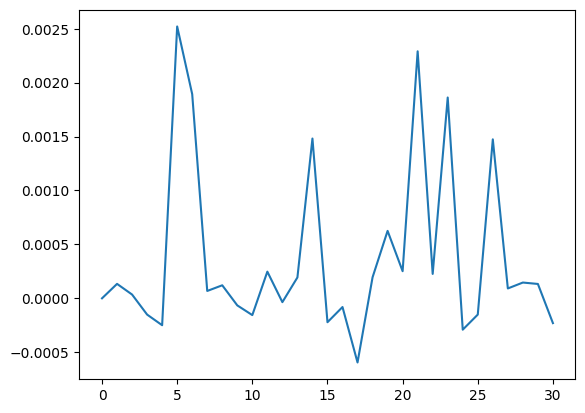

In [95]:
plt.plot(average_rewards)

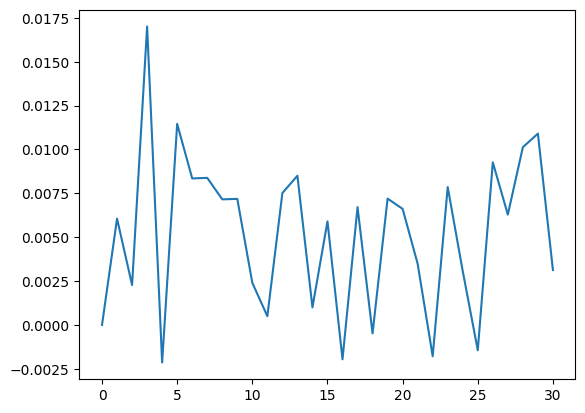

In [89]:
plt.plot(average_rewards)

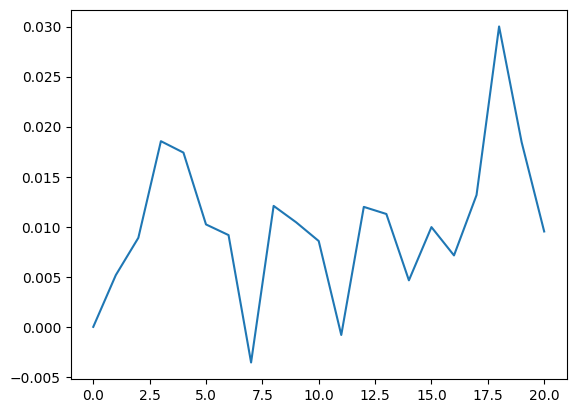

In [80]:
plt.plot(average_rewards)

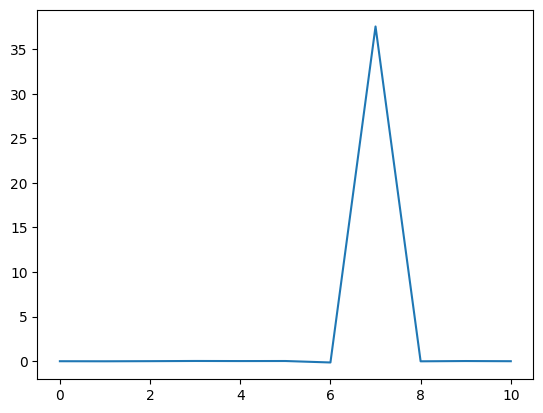

In [77]:
plt.plot(average_rewards)

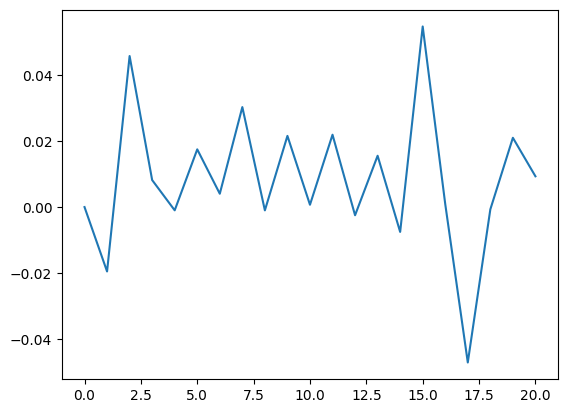

In [74]:
plt.plot(average_rewards)

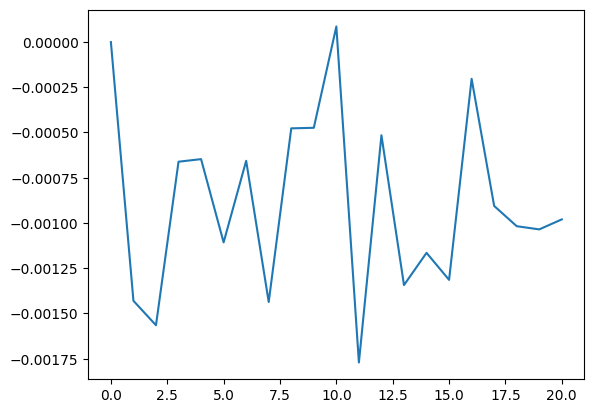

In [71]:
plt.plot(average_rewards)

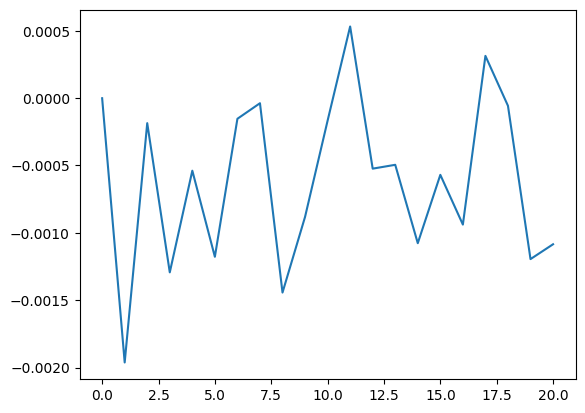

In [68]:
plt.plot(average_rewards)

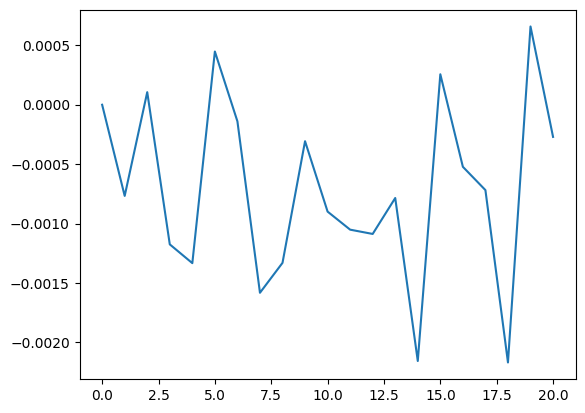

In [65]:
plt.plot(average_rewards)

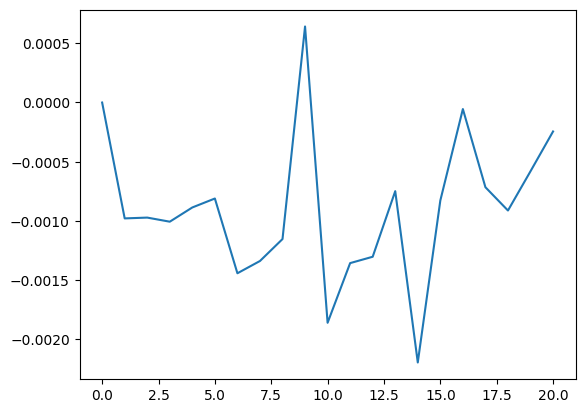

In [62]:
plt.plot(average_rewards)

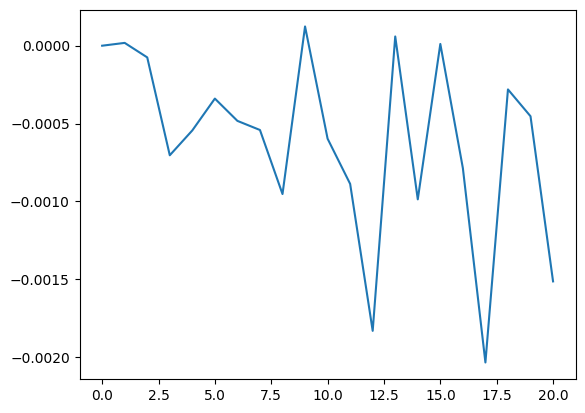

In [56]:
plt.plot(average_rewards)

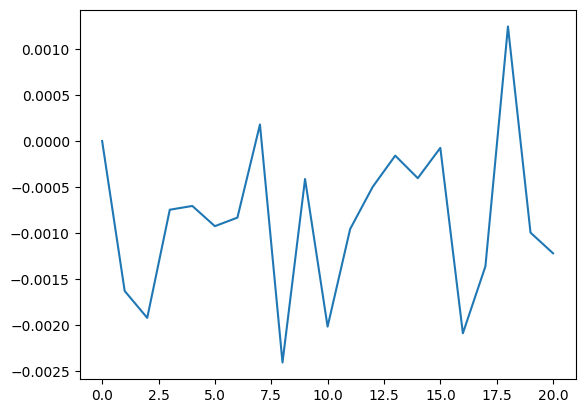

In [49]:
plt.plot(average_rewards)

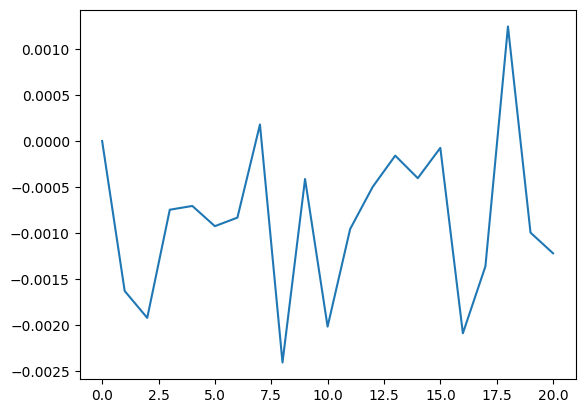

In [47]:
plt.plot(average_rewards)

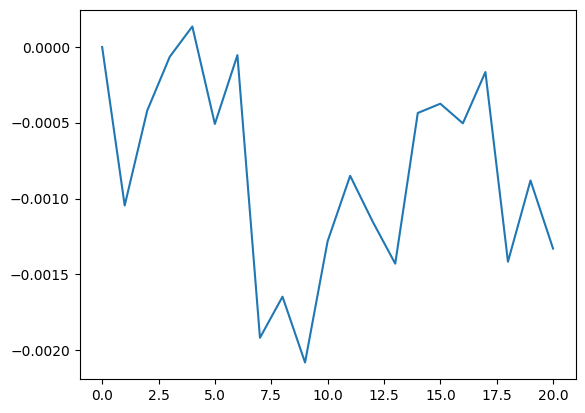

In [44]:
plt.plot(average_rewards)

In [35]:
sum(rewards) / len(rewards)

-0.0008132808927024155